In [1]:
#changes style of notebook for personal preference
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import needed libraries for the projects
import pandas as pd
import math
import requests, os
from pandas import Series, DataFrame
import sqlite3
import numpy as np

In [55]:
#downloads files from a given url if they are not already downloaded
def download(filename, url):
    if os.path.exists(filename):
        return (str(filename) + " already exists!")

    request = requests.get(url)
    request.raise_for_status()
    data = request.text
    file = open(filename, "w", encoding="utf-8")
    file.write(data)
    file.close()

    return (str(filename) + " created!")

In [50]:
#downloads all files needed and reads them
download("countries.json","https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/p10/countries.json")
countries = pd.read_json("countries.json")
download("capitals.json","https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/p10/capitals.json")
capitals=pd.read_json("capitals.json")

How many countries are in the dataset?

In [5]:
len(countries)

174

What is the total population of the countries in the dataset?

In [6]:
Series(countries["population"]).sum()

6261901793

What are the names of the capitals of the dataset in alpabetical order?

In [7]:
sorted(list(capitals["capital"]))

['Abu Dhabi',
 'Abuja',
 'Accra',
 'Addis Ababa',
 'Algiers',
 'Amman',
 'Amsterdam',
 'Ankara',
 'Antananarivo',
 'Apia',
 'Ashgabat',
 'Asmara',
 'Astana',
 'Asuncion',
 'Athens',
 'Baghdad',
 'Baku',
 'Bamako',
 'Bangkok',
 'Beijing',
 'Beirut',
 'Belmopan',
 'Berlin',
 'Bern',
 'Bishkek',
 'Bissau',
 'Bogota',
 'Brasilia',
 'Bridgetown',
 'Brussels',
 'Bucharest',
 'Budapest',
 'Buenos Aires',
 'Bujumbura',
 'Cairo',
 'Canberra',
 'Caracas',
 'Castries',
 'Chisinau',
 'Colombo',
 'Conakry',
 'Copenhagen',
 'Dakar',
 'Damascus',
 'Dar es Salaam',
 'Dhaka',
 'Djibouti',
 'Doha',
 'Dublin',
 'Dushanbe',
 'Freetown',
 'Gaborone',
 'George Town',
 'Georgetown',
 'Guatemala City',
 'Hagatna',
 'Hamilton',
 'Hanoi',
 'Harare',
 'Havana',
 'Helsinki',
 'Islamabad',
 'Jakarta',
 'Jamestown',
 'Jerusalem',
 'Kabul',
 'Kampala',
 'Kathmandu',
 'Khartoum',
 'Kigali',
 'Kingston',
 'Kingstown',
 'Kuala Lumpur',
 'Kuwait City',
 'Kyiv',
 'La Paz',
 'Libreville',
 'Lilongwe',
 'Lima',
 'Lisbon',


What is the capital of Italy?

In [8]:
for i in range(len(capitals["country"])):
    if capitals.iloc[i,0] == "Italy":
        c= capitals.iloc[i,1]
c

'Rome'

Brussels is the capital of what country?

In [9]:
for i in range(len(capitals["country"])):
    if capitals.iloc[i,1]=="Brussels":
        c= capitals.iloc[i,0]
c

'Belgium'

Which 7 countries have the southern-most capitals?

In [10]:
list(capitals.sort_values("latitude")[:7]["country"])

['New Zealand',
 'Australia',
 'Uruguay',
 'Argentina',
 'Chile',
 'Lesotho',
 'Swaziland']

Which 10 countries have the souther-most capitals?

In [11]:
list(capitals.sort_values("latitude",ascending=False)[:10]["country"])

['Iceland',
 'Finland',
 'Norway',
 'Estonia',
 'Sweden',
 'Latvia',
 'Russia',
 'Denmark',
 'Lithuania',
 'Belarus']

This next cell is a function that finds the distance of two points(in miles) given the latitude and longitude of the two points.

In [12]:
def distance(point1, point2):
    if point1==point2:
        return(None)
    latitude1, longitude1 = point1
    latitude2, longitude2 = point2
    radius = 3956 # mi
    dlat = math.radians(latitude2-latitude1)
    dlon = math.radians(longitude2-longitude1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(latitude1)) \
        * math.cos(math.radians(latitude2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = radius * c
    return distance

This next cell returns the cordinates of a country.

In [13]:
def find_coordinates(country):
    for i in range(len(capitals["country"])):
        if capitals.iloc[i,0]==country:
            x=(capitals.iloc[i,2],capitals.iloc[i,3])
    return(x)

What is the distance between Germany and Norway?

In [14]:
distance(find_coordinates("Germany"),find_coordinates("Norway"))

520.8581822565819

The next cell returns a data frame of countries that shows the distance between every country in the list.

In [15]:
def all_distances(countries):
    d={}
    for i in countries:
        row={}
        for ii in countries:
            if (distance(find_coordinates(i),find_coordinates(ii)))==None:
                row[ii]=None
            else:
                row[ii]=distance(find_coordinates(i),find_coordinates(ii))
        d[i]=row
    return d 

What is all of the distances between Switzerland, Netherlands, and Spain?

In [16]:
DataFrame(all_distances(['Switzerland','Netherlands','Spain']))

,Switzerland,Netherlands,Spain
Switzerland,NaN,392.028643,714.804467
Netherlands,392.028643,NaN,919.684100
Spain,714.804467,919.684100,NaN


This next cell returns a list of all the countries that are in a continent.

In [17]:
def Countries_in_Continent(Continent):
    C=[]
    for i in range(len(countries)):
        if countries["continent"][i]==Continent:
            C.append(countries["country"][i])
    return C

What is the distance between every pair of countries in the South American continent?

In [18]:
South_America_Countries=Countries_in_Continent("South America")      
DataFrame(all_distances(South_America_Countries))

,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
Chile,NaN,2897.553095,2636.644599,2895.810776,1869.737031,1180.741903,3043.657689,690.784168,1531.480189,2350.207788,833.403262,963.635535
Guyana,2897.553095,NaN,1105.066312,215.336336,1709.071018,1747.772670,646.969843,2857.520462,1837.860149,1483.193753,2878.638295,2214.288286
Colombia,2636.644599,1105.066312,NaN,1303.405134,2275.516286,1512.119255,639.361118,2885.355610,1167.505359,451.004119,2962.230943,2337.615967
Suriname,2895.810776,215.336336,1303.405134,NaN,1572.674232,1778.772975,861.456786,2799.886429,1944.750017,1661.699022,2809.744412,2153.855447
Brazil,1869.737031,1709.071018,2275.516286,1572.674232,NaN,1342.297074,2228.690679,1459.139733,1967.770515,2344.584922,1412.096335,908.185710
Bolivia,1180.741903,1747.772670,1512.119255,1778.772975,1342.297074,NaN,1865.131181,1379.455701,669.926372,1326.758656,1467.253638,906.799256
Venezuela,3043.657689,646.969843,639.361118,861.456786,2228.690679,1865.131181,NaN,3157.624051,1705.418003,1088.064117,3207.352176,2544.799572
Argentina,690.784168,2857.520462,2885.355610,2799.886429,1459.139733,1379.455701,3157.624051,NaN,1936.465790,2696.149591,143.069943,646.036441
Peru,1531.480189,1837.860149,1167.505359,1944.750017,1967.770515,669.926372,1705.418003,1936.465790,NaN,823.054491,2046.571589,1558.635236
Ecuador,2350.207788,1483.193753,451.004119,1661.699022,2344.584922,1326.758656,1088.064117,2696.149591,823.054491,NaN,2791.196721,2218.650964


What country in Southe America is most centralized(has the shortest average distance to other countries in South America)?

In [19]:
DataFrame(all_distances(South_America_Countries)).mean(axis=1,numeric_only=True).sort_values().index[0]

'Bolivia'

What is the least central country in South America(has the largest average distance to other countries in South America)?

In [20]:
DataFrame(all_distances(South_America_Countries)).mean(axis=1,numeric_only=True).sort_values(ascending=False).index[0]

'Uruguay'

How close is each country in SOuth America to it's nearest neighbor?

In [21]:
closest={}
df=DataFrame(all_distances(South_America_Countries))
for x in df:
    closest[x]={"nearest":df[x].idxmin(),"distance":df[x].min()}
DataFrame(closest).transpose()

,nearest,distance
Chile,Argentina,690.784
Guyana,Suriname,215.336
Colombia,Ecuador,451.004
Suriname,Guyana,215.336
Brazil,Paraguay,908.186
Bolivia,Peru,669.926
Venezuela,Colombia,639.361
Argentina,Uruguay,143.07
Peru,Bolivia,669.926
Ecuador,Colombia,451.004


How far is each country in South America to it's furthes neighbor. 

In [22]:
furthest={}
df=DataFrame(all_distances(South_America_Countries))
for x in df:
    furthest[x]={"furthest":df[x].idxmax(),"distance":df[x].max()}
DataFrame(furthest).transpose()

,furthest,distance
Chile,Venezuela,3043.66
Guyana,Chile,2897.55
Colombia,Uruguay,2962.23
Suriname,Chile,2895.81
Brazil,Ecuador,2344.58
Bolivia,Venezuela,1865.13
Venezuela,Uruguay,3207.35
Argentina,Venezuela,3157.62
Peru,Uruguay,2046.57
Ecuador,Uruguay,2791.2


The next cell sets up sqlite3.

In [23]:
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)

def qry(sql):
    return pd.read_sql(sql,conn)

How many countries are in each continent?

In [24]:
qry("""
SELECT continent, COUNT(continent) AS "number of countries"
FROM countries
GROUP BY continent
order by "number of countries", continent
""")

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,47


How many countries are in each continent as a bar plot?

Text(0.5, 0, 'continent')

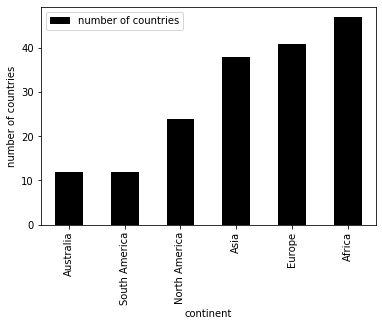

In [25]:
ax = (qry("""
SELECT continent, COUNT(continent) AS "number of countries"
FROM countries
GROUP BY continent
order by "number of countries", continent
""").set_index("continent").plot.bar(color='black'))
ax.set_ylabel('number of countries')
ax.set_xlabel('continent')

What is the total area of each continet?

In [26]:
qry("""
select continent, Sum(Area) as "total area"
from countries
group by continent
order by "total area" Desc
""")

,continent,total area
0,Asia,29731231
1,Africa,25199550
2,Europe,23708430
3,North America,22327685
4,South America,17715335
5,Australia,8488612


What is the total area of each continet as a bar graph?

Text(0.5, 0, 'continent')

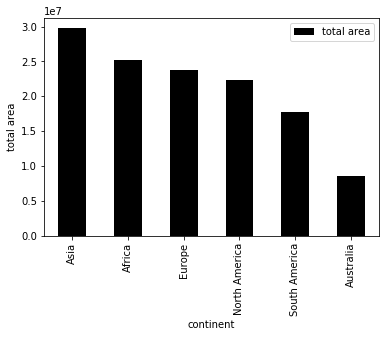

In [27]:
ax = (qry("""
select continent, Sum(Area) as "total area"
from countries
group by continent
order by "total area" Desc
""").set_index("continent").plot.bar(color='black'))
ax.set_ylabel('total area')
ax.set_xlabel('continent')

What is the area of each country in South America?

In [28]:
qry("""
select country,area
from countries
where continent="South America"
order by area desc
""")

,country,area
0,Brazil,8511965
1,Argentina,2766890
2,Peru,1285220
3,Colombia,1138910
4,Bolivia,1098580
5,Venezuela,912050
6,Chile,756950
7,Paraguay,406750
8,Ecuador,283560
9,Guyana,214970


What are the top 8 countries that have the largest real GDP(popluation*GDP-per-capita)?

In [29]:
qry("""
select country,(population * "gdp-per-capita"/1000000000) as "real GDP (billion)"
from countries
order by "real GDP (billion)" desc
""").head(8)

,country,real GDP (billion)
0,United States,11281
1,China,6569
2,Japan,3594
3,India,3176
4,Germany,2274
5,France,1680
6,United Kingdom,1678
7,Italy,1552


What are the top 8 countries that have the largest real GDP as a bar graph?

Text(0, 0.5, 'real GDP (billion)')

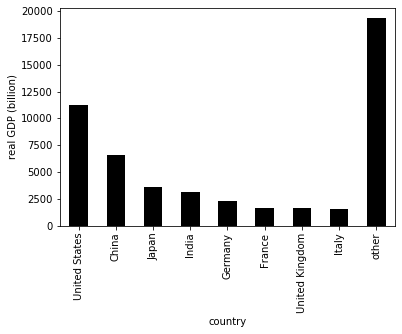

In [30]:
df=(qry("""
select country,(population * "gdp-per-capita"/1000000000) as "real GDP (billion)"
from countries
order by "real GDP (billion)" desc
""")).set_index('country')
    
top8=df['real GDP (billion)'].iloc[:8]
top8['other']=df['real GDP (billion)'].iloc[8:].sum()
ax=top8.plot.bar(color='black')
ax.set_ylabel('real GDP (billion)')

What is the relationship between GDP per capita and net-migration?

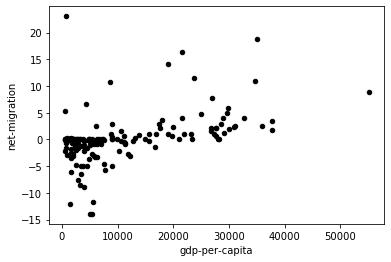

In [31]:
qry("""
select "gdp-per-capita", "net-migration"
from countries
""").plot.scatter(x="gdp-per-capita",y="net-migration",color='black')

What is the value of the correlation between GDP per capita and net-migration?

In [32]:
qry("""
select "gdp-per-capita", "net-migration"
from countries
""").corr().iloc[0,1]

0.4523211325011283

What is the relationship between GDP per capita and death rates?

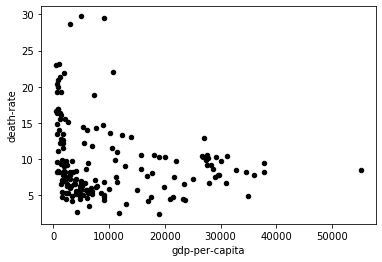

In [33]:
qry("""
select "gdp-per-capita", "death-rate"
from countries
""").plot.scatter(x="gdp-per-capita",y="death-rate",color='black')

What is the relationship between GDP per capita and infant-mortality?

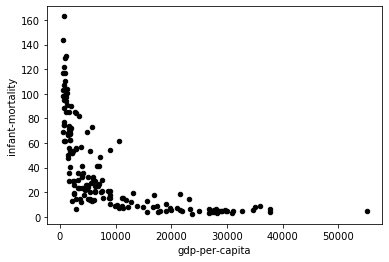

In [34]:
qry("""
select "gdp-per-capita", "infant-mortality"
from countries
""").plot.scatter(x="gdp-per-capita",y="infant-mortality",color='black')

What is the relationship between GDP per capita and inverse of infant-mortality?

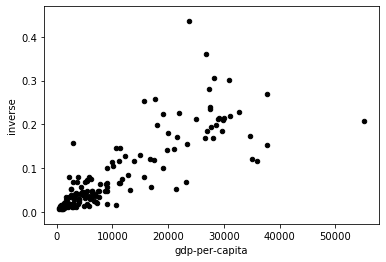

In [35]:
qry("""
select "gdp-per-capita", 1/"infant-mortality" as "inverse"
from countries
""").plot.scatter(x="gdp-per-capita",y="inverse",color='black')

What are the coefficients of a y=mx+b line that is fitted to the scatter plot using the least squares method?

In [36]:
df=qry("""
select "gdp-per-capita", 1/"infant-mortality" as "inverse"
from countries
""")

df["1"] = 1

coefficients = np.linalg.lstsq(df[["gdp-per-capita","1"]], df["inverse"], rcond=None)[0] # coefficients is (m,b)
m = coefficients[0] # slope
b = coefficients[1] # intercept
(m,b)


(6.482983154848297e-06, 0.013237849092120857)

What is the expected value for infant-mortality when gdp-per-capita is 50000?

In [37]:
df=qry("""
select "gdp-per-capita", 1/"infant-mortality" as "inverse"
from countries
""")

df["1"] = 1

coefficients = np.linalg.lstsq(df[["gdp-per-capita","1"]], df["inverse"], rcond=None)[0] # coefficients is (m,b)
m = coefficients[0] # slope
b = coefficients[1] # intercept
1/((m*50000)+b)

2.963955279079342

Plot the regression line to the scatter plot.

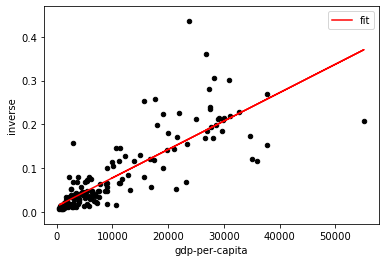

In [38]:
df=qry("""
select "gdp-per-capita", 1/"infant-mortality" as "inverse"
from countries
""")

df["1"] = 1

coefficients = np.linalg.lstsq(df[["gdp-per-capita","1"]], df["inverse"], rcond=None)[0] # coefficients is (m,b)
m = coefficients[0] # slope
b = coefficients[1] # intercept
ax = df.plot.scatter(x='gdp-per-capita', y='inverse',color='black')

df["fit"] = df["gdp-per-capita"] * m + b
df.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)

In [39]:
#close sqlite3 connection
conn.close()